# Mounting google drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'1 - Pre Midsem.pdf'
 1-s2.0-S0016706116306747-main.pdf
 25_data.csv
 25_data.csv.gsheet
 25_sample_images
'2 - Post Midsem.pdf'
 500_questions.gsheet
'Additional problems.pdf'
'Admit card  '
'AKD [thedrunkard1234].zip (Unzipped Files)'
 amex_ps
 AT053-VW6.pdf
 Averaged_Images
 BasicMeds
'Blockchain course udemy'
 cancer_prob.ipynb
 CateMaker.ipynb
'C Borgnakke_ Richard Edwin Sonntag_ Gordon J Van Wylen-Fundamentals of thermodynamics-Wiley (2009) (1).pdf'
'C Borgnakke_ Richard Edwin Sonntag_ Gordon J Van Wylen-Fundamentals of thermodynamics-Wiley (2009).pdf'
'Cell Division Cell Cycle  Apostosis- 2017.ppt'
 Classroom
 Classroom_problems1.pdf
 Classroom_problems2.pdf
'Class Test_2018 (1).gsheet'
'Class Test_2018.gsheet'
'Class Test_2018.xlsx'
'Colab Notebooks'
 CroppedImages
 CroppedImages_25_samples
 Data.csv
 dataset.csv
 Description.csv
 Description.txt
 description.zip
'description.zip (Unzipped Files)'
'description.zip (Unzipped Files) (1)'
 Documentation-soln.gdoc
 edited_getPDFPer

In [3]:

# This cell contains all the references to libraries that are needed to train a convolutional neural network
from __future__ import print_function, division

import numpy as np
import random
import os
import glob
# https://opencv.org/
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt

from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
import tensorflow as tf
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.train import RMSPropOptimizer
import cv2
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [0]:
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# Reading and pre-processing the input images

In [0]:
train = pd.read_csv('/content/drive/My Drive/Game of DL/train.csv')
test = pd.read_csv('/content/drive/My Drive/Game of DL/test.csv')

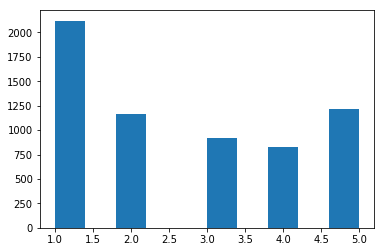

In [0]:
plt.hist(train['category'])
plt.show()

In [0]:
train['category'].unique()

array([1, 2, 3, 4, 5])

In [0]:
for i in [1,2,3,4,5]:
  print(str(i) +' : '+ str(len(train[train['category']==i])))

1 : 2120
2 : 1167
3 : 916
4 : 832
5 : 1217


In [0]:
train['category'] = train['category'].apply(lambda x:str(x))

In [0]:
len(os.listdir('/content/drive/My Drive/Game of DL/train/'))

6252

In [0]:
height = []
width = []
for image in tqdm(os.listdir('/content/drive/My Drive/Game of DL/train/')):
  img_path = '/content/drive/My Drive/Game of DL/train/'+image
  img = cv2.imread(img_path)
  height.append(img.shape[0])
  width.append(img.shape[1])

100%|██████████| 6252/6252 [00:32<00:00, 194.88it/s]


In [0]:
print(min(height) , min(width) , max(height) , max(width))

41 91 158 210


In [0]:
image_path = '/content/drive/My Drive/Game of DL/test/'

In [0]:
image = image_path + os.listdir('/content/drive/My Drive/Game of DL/test/')[0]

In [0]:
image = Image.open(image)

In [0]:
image.width

210

In [0]:
height = []
width = []
for image in tqdm(os.listdir('/content/drive/My Drive/Game of DL/test/')):
  img_path = '/content/drive/My Drive/Game of DL/test/'+image
  img = cv2.imread(img_path)
  height.append(img.shape[0])
  width.append(img.shape[1])

100%|██████████| 2680/2680 [12:12<00:00,  3.98it/s]


In [0]:
print(min(height) , min(width) , max(height) , max(width))

42 97 158 210


In [0]:
np.unique(height)

array([ 42,  57,  58,  66,  70,  71,  72,  73,  74,  75,  78,  79,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158])

In [0]:
np.unique(width)

array([ 97,  98, 101, 105, 106, 112, 115, 119, 120, 122, 126, 135, 137,
       143, 144, 146, 156, 158, 160, 161, 162, 173, 174, 179, 184, 185,
       186, 188, 191, 192, 193, 195, 197, 198, 199, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210])

In [0]:
from PIL import Image

def resize(image_pil):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    
    width = 210
    height = 158
    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:
        # It must be fixed by width
        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:
        # Fixed by height
        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0,0,0,0))
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    final_img = background.convert('RGB')
    return final_img

In [0]:
path_train = os.listdir('/content/drive/My Drive/Game of DL/train/')

In [0]:
path_train[:3]

['2863932.jpg', '2894476.jpg', '677115.jpg']

In [ ]:
#Resizing the input images to get them all to have same size
#Doing this for both train and test images

In [0]:
for image in tqdm(path_train):
  path = '/content/drive/My Drive/Game of DL/train/' + image
  im = Image.open(open(path, 'rb'))
  new_img = resize(im)
  new_img.save(path)

100%|██████████| 6252/6252 [23:00<00:00,  4.43it/s]


In [0]:
path_test = os.listdir('/content/drive/My Drive/Game of DL/test/')

In [0]:
for image in tqdm(path_test):
  path = '/content/drive/My Drive/Game of DL/test/' + image
  im = Image.open(open(path, 'rb'))
  new_img = resize(im)
  new_img.save(path)

100%|██████████| 2680/2680 [10:12<00:00,  4.46it/s]


### Defining image generator for image augmentation for better training

In [10]:
image_data_list = []
#n = 100 # 
#img_folder = '../input/flipkart-traindata/training_r3/training/'
train_datagen=ImageDataGenerator(
    
                                 zoom_range=0.2,
                                 shear_range = 0.1,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 brightness_range = [0.3 , 1],
                                 horizontal_flip=True,
                                 validation_split=0.1,
                                 rescale=1./255,
                                 fill_mode='nearest'
                                 ) 
train_generator=train_datagen.flow_from_dataframe(train,
                                                '/content/drive/My Drive/Game of DL/train/',
                                                target_size=(158,210),
                                                color_mode='rgb',
                                                x_col="image",
                                                y_col="category",
                                                subset="training",
                                                batch_size=331,
                                                seed=42,
                                                shuffle=True,
                                                class_mode="categorical",
                                                preprocessing_function=preprocess_input)
                                                #preprocessing_function=resize)
step_size_train=train_generator.n//train_generator.batch_size
train_generator.n

Found 5626 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


5626

In [11]:
valid_generator=train_datagen.flow_from_dataframe(
                                            dataframe=train,
                                            directory="/content/drive/My Drive/Game of DL/train/",
                                            x_col="image",
                                            y_col="category",
                                            subset="validation",
                                            batch_size=125,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(158,210),
                                            color_mode = 'rgb',
                                            preprocessing_function=preprocess_input)
                                            #preprocessing_function=resize)
step_size_valid=valid_generator.n//valid_generator.batch_size
valid_generator.n


Found 625 validated image filenames belonging to 5 classes.


625

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
                                              dataframe=test,
                                              directory="/content/drive/My Drive/Game of DL/test/",
                                              x_col="image",
                                              y_col=None,
                                              batch_size=40,
                                              seed=42,
                                              shuffle=False,
                                              class_mode=None,
                                              target_size=(158,210),
                                              color_mode = 'rgb',
                                              preprocessing_function=preprocess_input)
                                              #preprocessing_function=resize)
step_size_test=test_generator.n//test_generator.batch_size
test_generator.n


Found 2680 validated image filenames.


2680

### Defining metric "F1"

In [0]:
#Defination of f1 score
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Loading the pre-trained model of resnet50 / xception and using layers compatible by colab's TPU

In [13]:
IMG_SHAPE = (158,210,3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')
print("Number of layers in the base model: ", len(base_model.layers))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable = True

model = tf.keras.models.Sequential()
# first (and only) set of FC => RELU layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# softmax classifier
model.add(tf.keras.layers.Dense(5,activation='softmax'))

pretrainedInput = base_model.input
pretrainedOutput = base_model.output
output = model(pretrainedOutput)
model = tf.keras.models.Model(pretrainedInput, output)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 158, 210, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 164, 216, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 79, 105, 64)  9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 79, 105, 64)  256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

#### Important while compiling : Use all the layers from tf.keras.* and use optimizers available in tf.train.* for smooth execution

In [20]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001 ),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

INFO:tensorflow:Querying Tensorflow master (grpc://10.47.240.170:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 36414899604973840)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 8938243895504203225)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 9072353448309015249)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 1991917103274817748)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 15723003652646883014)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/j

### Important while deciding batch size while using TPU model : Use bath sizes that are completely divisible by the no. of images in the folder or Colab will always throw up error relating image sizes.

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
tpu_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=150,
                    shuffle = True
)

Epoch 1/150
17/17 [==============================] - 81s 5s/step - loss: 0.0535 - acc: 0.9830 - val_loss: 0.8274 - val_acc: 0.8183
Epoch 2/150
17/17 [==============================] - 73s 4s/step - loss: 0.0524 - acc: 0.9833 - val_loss: 0.5417 - val_acc: 0.8567
Epoch 3/150
 9/17 [==============>...............] - ETA: 26s - loss: 0.0456 - acc: 0.9841

### Predicting using tpu_model

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [44]:
pred[:5]

array([[1.3973824e-05, 8.2707138e-06, 1.3838460e-05, 9.9994981e-01,
        1.4086795e-05],
       [1.4101021e-12, 4.5757998e-12, 1.2639508e-13, 1.0000000e+00,
        1.4228664e-10],
       [1.0780187e-06, 5.7805340e-07, 8.5237673e-07, 9.9999285e-01,
        4.6839709e-06],
       [6.0605016e-06, 9.9999380e-01, 3.4338570e-09, 1.5803955e-08,
        6.2564837e-08],
       [1.2091868e-05, 1.7196139e-06, 1.0084345e-04, 9.9970281e-01,
        1.8261439e-04]], dtype=float32)

In [0]:
predicted_class_indices=np.argmax(pred,axis=1)

In [46]:
predicted_class_indices[66:70]

array([3, 1, 1, 3])

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
sample_sub = pd.read_csv('/content/drive/My Drive/Game of DL/sample_submission.csv')

In [0]:
sample_sub['category'] = predictions

In [0]:
#sample_sub.head()
sample_sub.to_csv('/content/drive/My Drive/Game of DL/submission12.csv',index=False)